# Entrega 1

## 1. Preprocesamiento de datos 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

file_path = 'data/dblp-2025-03-01 - 15.03.2025.csv'

data = pd.read_csv(file_path)
print("Archivo CSV cargado correctamente.")


C:\Users\Soppita\AppData\Local\Temp\ipykernel_27940\2065117929.py:9: DtypeWarning: Columns (4,6,8,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Archivo CSV cargado correctamente.


In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788386 entries, 0 to 3788385
Data columns (total 22 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   mdate                                      object 
 1   key                                        object 
 2   title                                      object 
 3   author                                     object 
 4   pages                                      object 
 5   year                                       float64
 6   volume                                     object 
 7   journal                                    object 
 8   number                                     object 
 9   ee                                         object 
 10  url                                        object 
 11  stream                                     object 
 12  month                                      object 
 13  cdrom                                     

In [4]:
print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())


Cantidad de valores nulos por columna:
mdate                                              0
key                                                0
title                                              1
author                                             0
pages                                         841566
year                                               3
volume                                            79
journal                                            5
number                                       1363867
ee                                             24006
url                                              783
stream                                       3567477
month                                        3478516
cdrom                                        3784385
cite                                         3786546
note                                         3787025
editor                                       3788371
<cyfunction Entity at 0x00000213F35C8520>    3788319
crossr

## 2. Análisis exploratorio

In [6]:
if 'year' in data.columns:
    try:
        data['year'] = pd.to_numeric(data['year'], errors='coerce').dropna().astype(int)
        print("\nColumna 'year' convertida a entero (ignorando valores no numéricos).")
    except KeyError:
        print("\nLa columna 'year' no existe.")

def extract_author_names(author_list_str):
    try:
        author_list = ast.literal_eval(author_list_str)
        return [author['name'] for author in author_list]
    except (ValueError, TypeError):
        return []  # Retorna una lista vacía si hay un error al parsear

if 'author' in data.columns:
    data['authors'] = data['author'].apply(extract_author_names)
    print("\nColumna 'author' procesada y nombres de autores extraídos en la columna 'authors'.")
    print("Primeras filas de la columna 'authors':")
    print(data['authors'].head())
else:
    print("\nLa columna 'author' no existe.")


Columna 'year' convertida a entero (ignorando valores no numéricos).

Columna 'author' procesada y nombres de autores extraídos en la columna 'authors'.
Primeras filas de la columna 'authors':
0                                                   []
1                                                   []
2                                                   []
3                                       [Emilio Coppa]
4    [Wei-Di Chang, Scott Fujimoto, David Meger, Gr...
Name: authors, dtype: object


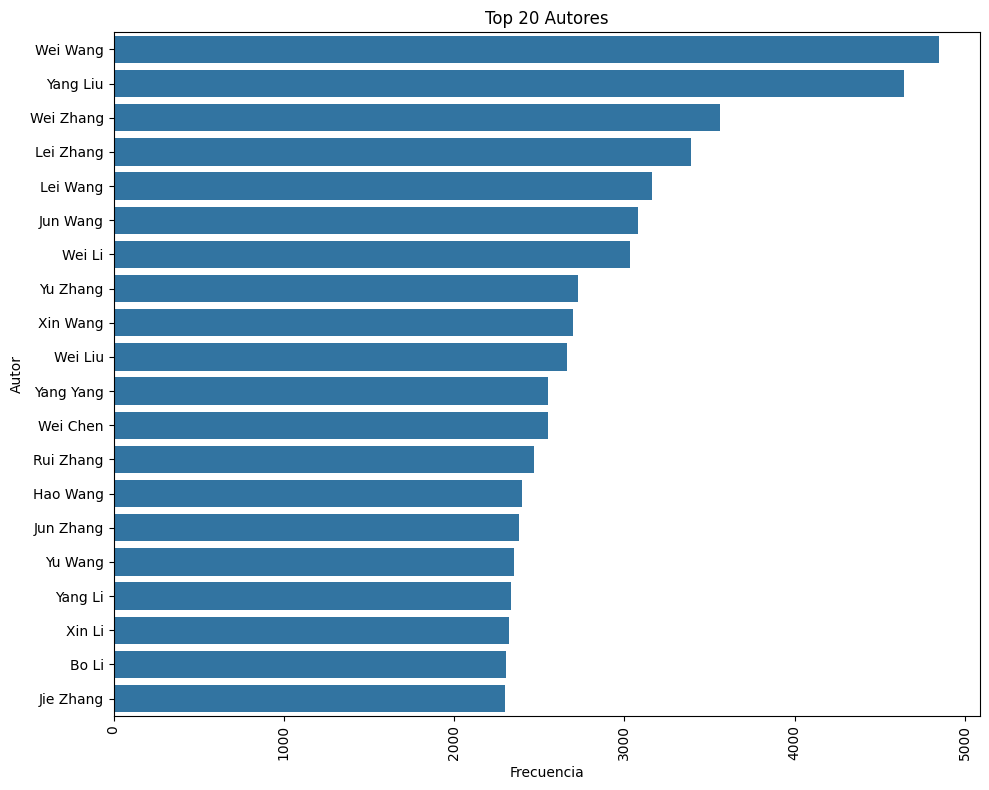

In [10]:
# b) Análisis de Frecuencia de Autores
if 'authors' in data.columns:
    all_authors = [author for sublist in data['authors'] for author in sublist]
    author_counts = Counter(all_authors)
    top_authors = author_counts.most_common(20)

    plt.figure(figsize=(10, 8))
    sns.barplot(x=[count for word, count in top_authors], y=[word for word, count in top_authors])
    plt.title('Top 20 Autores')
    plt.xlabel('Frecuencia')
    plt.ylabel('Autor')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('top_autores.png') # Guarda el gráfico
    plt.show()
else:
    print("\nNo se puede realizar el análisis de frecuencia de autores porque la columna 'authors' no existe.")

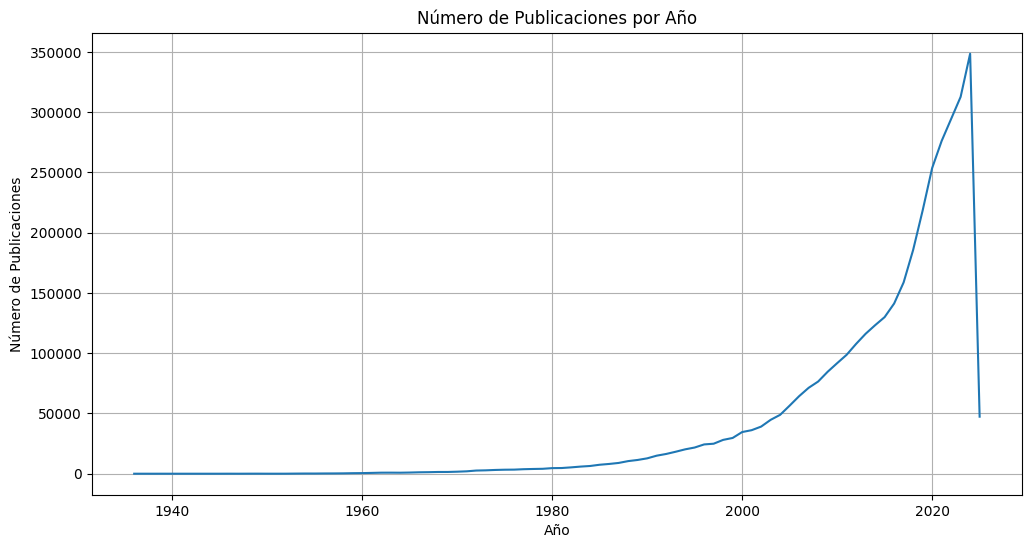

In [11]:
# a) Análisis de la Producción Científica por Año
if 'year' in data.columns:
    yearly_counts = data['year'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
    plt.title('Número de Publicaciones por Año')
    plt.xlabel('Año')
    plt.ylabel('Número de Publicaciones')
    plt.grid(True)
    plt.savefig('publicaciones_por_anio.png') # Guarda el gráfico
    plt.show()
else:
    print("\nNo se puede realizar el análisis de publicaciones por año porque la columna 'year' no existe.")

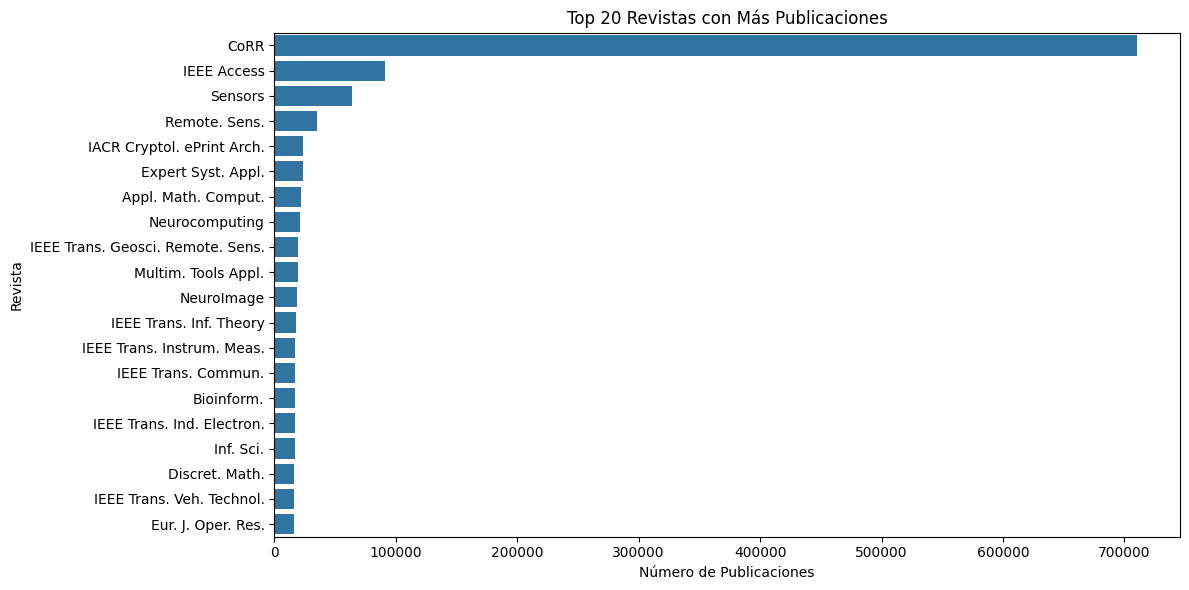


Análisis exploratorio básico completado. Los gráficos han sido guardados como archivos PNG.


In [12]:
# c) Análisis de Publicaciones por Revista (journal)
if 'journal' in data.columns:
    journal_counts = data['journal'].value_counts().nlargest(20)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=journal_counts.values, y=journal_counts.index, orient='h')
    plt.title('Top 20 Revistas con Más Publicaciones')
    plt.xlabel('Número de Publicaciones')
    plt.ylabel('Revista')
    plt.tight_layout()
    plt.savefig('publicaciones_por_revista.png') # Guarda el gráfico
    plt.show()
else:
    print("\nNo se puede realizar el análisis de publicaciones por revista porque la columna 'journal' no existe.")

print("\nAnálisis exploratorio básico completado. Los gráficos han sido guardados como archivos PNG.")